<a href="https://colab.research.google.com/github/BettyKamande/Bank-Account-Clasification-ML-Project/blob/main/Classification_Bank_Account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Bank_Account Google Colab/Classification_Bank_Account/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Bank_Account Google Colab/Classification_Bank_Account/Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Bank_Account Google Colab/Classification_Bank_Account/SampleSubmission.csv')

In [4]:
#inspecting the data
train_data.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test_data.head(3)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
train_data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [8]:
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
train_data.shape

(23524, 13)

In [10]:
test_data.shape

(10086, 12)

In [11]:
#Exploratory Data Analysis
#Checking for missing values
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [12]:
test_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
train_data['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [14]:
train_data['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [15]:
train_data['location_type'].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [16]:
train_data['cellphone_access'].value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [17]:
train_data['household_size'].value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

In [18]:
train_data['age_of_respondent'].value_counts()

30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: age_of_respondent, Length: 85, dtype: int64

In [19]:
train_data['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [20]:
train_data['relationship_with_head'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [21]:
train_data['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [22]:
train_data['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [23]:
train_data['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

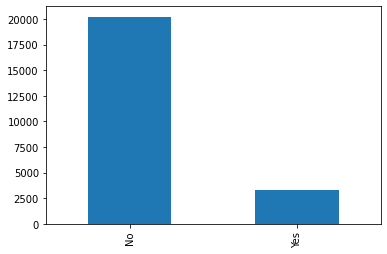

In [24]:
#univariate analysis using visualization tools
train_data['bank_account'].value_counts().plot.bar()

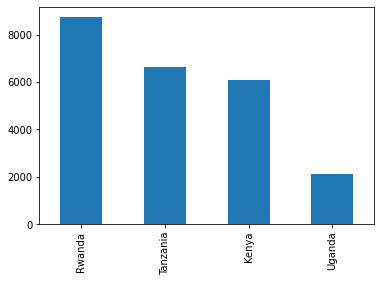

In [25]:
train_data['country'].value_counts().plot.bar()

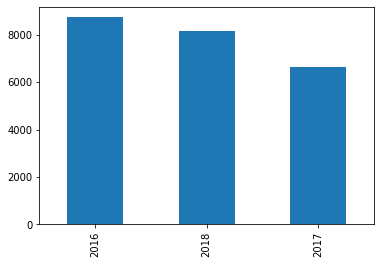

In [26]:
train_data['year'].value_counts().plot.bar()

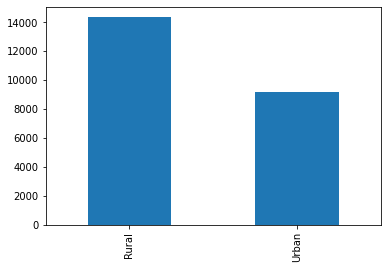

In [27]:
train_data['location_type'].value_counts().plot.bar()

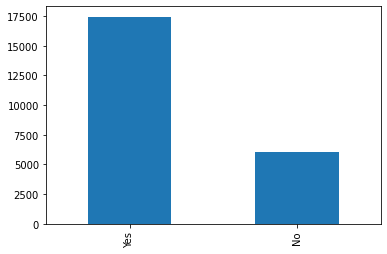

In [28]:
train_data['cellphone_access'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


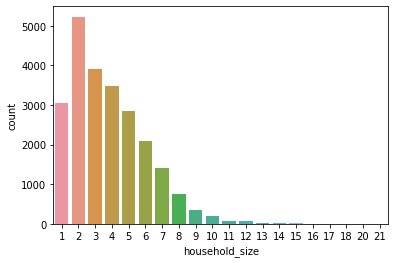

In [29]:
sns.countplot(train_data['household_size'])

(array([8.286e+03, 7.394e+03, 4.949e+03, 2.151e+03, 5.530e+02, 1.370e+02,
        3.500e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

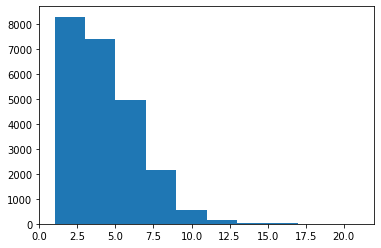

In [30]:
plt.hist(train_data['household_size'])

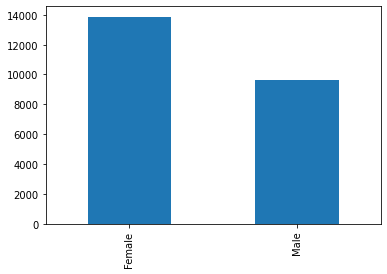

In [31]:
train_data['gender_of_respondent'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x7ff8a2e7fe10>,
 [Text(-0.30658550453375394, 1.0564115336410256, 'female'),
  Text(0.30658550453375427, -1.0564115336410256, 'male')])

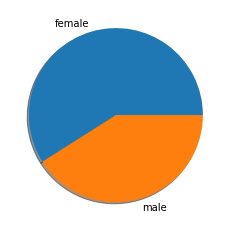

In [32]:
plt.pie(train_data['gender_of_respondent'].value_counts(), labels = ['female', 'male'], shadow = True)

(array([4809., 5480., 4707., 2785., 2164., 1733.,  965.,  640.,  189.,
          52.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <a list of 10 Patch objects>)

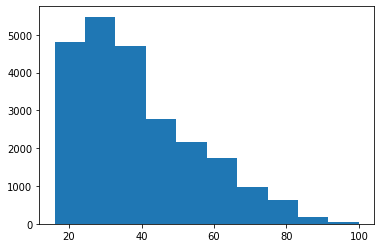

In [33]:
plt.hist(train_data['age_of_respondent'])

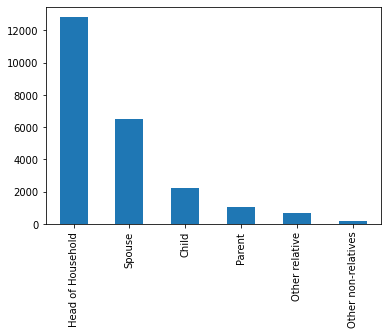

In [34]:
train_data['relationship_with_head'].value_counts().plot.bar()

(array([1.0749e+04, 0.0000e+00, 2.7080e+03, 0.0000e+00, 0.0000e+00,
        7.9830e+03, 0.0000e+00, 2.0760e+03, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

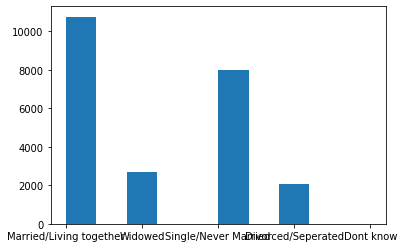

In [35]:
plt.hist(train_data['marital_status'])

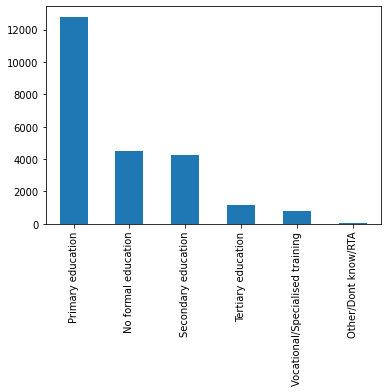

In [36]:
train_data['education_level'].value_counts().plot.bar()

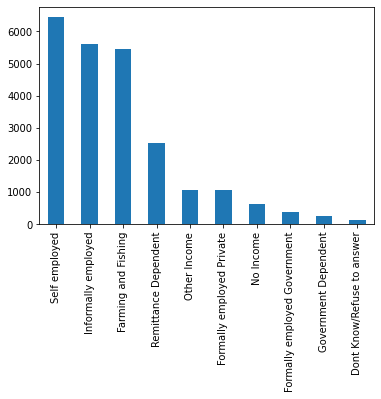

In [37]:
train_data['job_type'].value_counts().plot.bar()

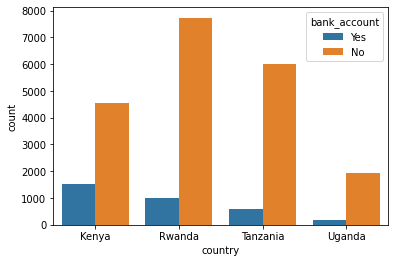

In [38]:
#bivariate analysis
sns.countplot(x = 'country', data = train_data, hue = 'bank_account')

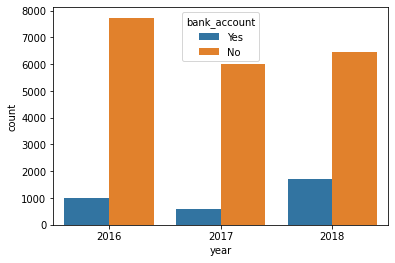

In [39]:
sns.countplot(x = 'year', data = train_data, hue = 'bank_account')

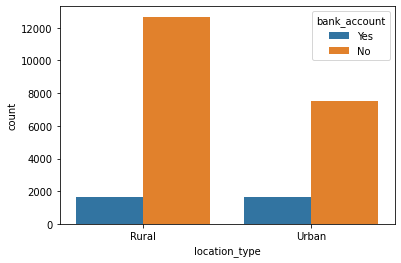

In [40]:
sns.countplot(x = 'location_type', data = train_data, hue = 'bank_account')

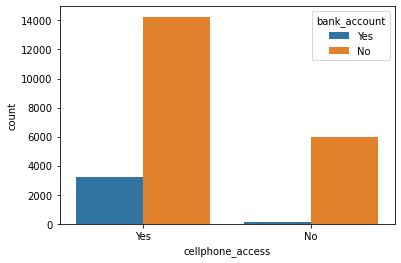

In [41]:
sns.countplot(x = 'cellphone_access', data = train_data, hue = 'bank_account')

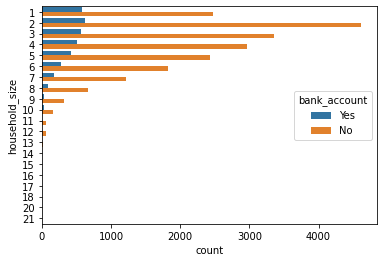

In [42]:
sns.countplot(y = 'household_size', data = train_data, hue = 'bank_account')

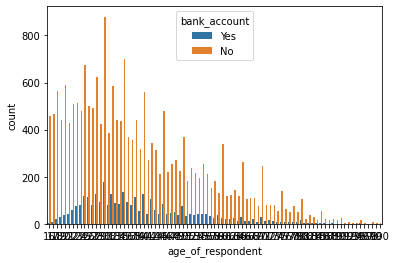

In [43]:
sns.countplot(x = 'age_of_respondent', data = train_data, hue = 'bank_account')

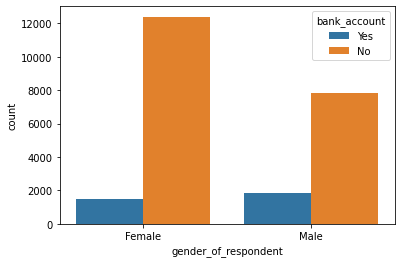

In [44]:
sns.countplot(x = 'gender_of_respondent', data = train_data, hue = 'bank_account')

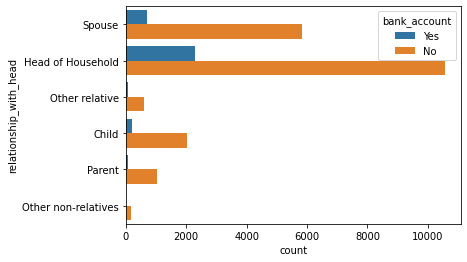

In [45]:
sns.countplot(y = 'relationship_with_head', data = train_data, hue = 'bank_account')

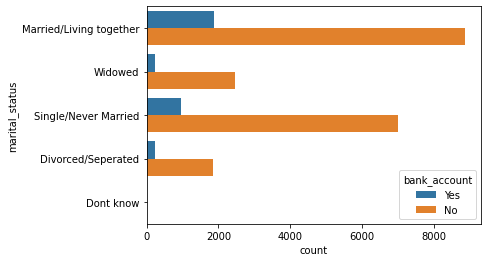

In [46]:
sns.countplot(y = 'marital_status', data = train_data, hue = 'bank_account')

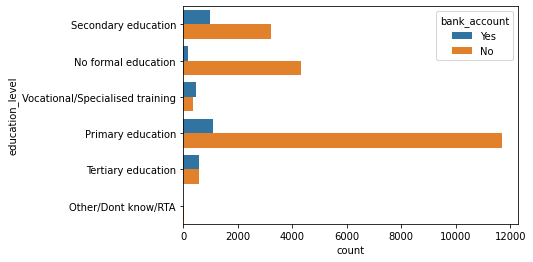

In [47]:
sns.countplot(y = 'education_level', data = train_data, hue = 'bank_account')

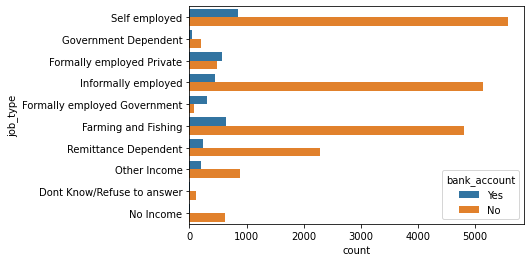

In [48]:
sns.countplot(y = 'job_type', data = train_data, hue = 'bank_account')

In [49]:
train_data['age_bins'] = pd.cut(train_data['age_of_respondent'], bins = 3,
                        labels = ['Young', 'Adult', 'Elderly'])
test_data['age_bins'] = pd.cut(train_data['age_of_respondent'], bins = 3,
                        labels = ['Young', 'Adult', 'Elderly'])

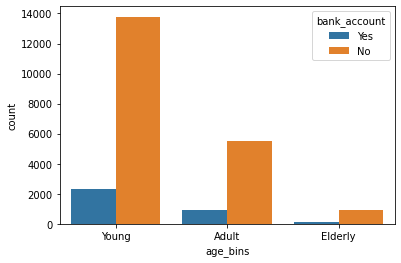

In [50]:
sns.countplot(x = 'age_bins', hue = 'bank_account', data = train_data)

In [51]:
train_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'age_bins'],
      dtype='object')

In [52]:
#data preparation for machine learning: data cleaning and data pre-processing
#data cleaning
train_data = train_data.drop(['uniqueid'], axis = 1)
train_data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'age_bins'],
      dtype='object')

In [53]:
test_data = test_data.drop(['uniqueid'], axis = 1)

test_data.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'age_bins'],
      dtype='object')

Data pre-processing: splitting the data into training data and testing data before pre-processing. We need to convert the categorical variables (objects) to numerical variables for machine learning, use onehot encoder
We should also convert the target variables (bank_account) to numerical variables using label encoder (1, 0)
Scale our data using minmax scaler or standard scaler



In [54]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 5.5 MB/s 


In [55]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(train_data)
categorical_columns

['country',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [57]:
train_data.head(2)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_bins
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Young
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Adult


In [58]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
all_data = pd.concat((train_data,test_data)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (33610, 13)


In [59]:
import category_encoders as ce
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_data, all_data['bank_account'], test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

ord_enc = ce.OrdinalEncoder(cols=['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'age_bins']).fit(X_train,y_train)


data = ord_enc.transform(all_data)
data.head()

main_cols =data.columns.difference(['bank_account'])

In [60]:
train = data[:ntrain].copy()
#train.drop_duplicates(inplace = True, ignore_index=True)
target = train.bank_account.copy()
train.drop('bank_account', axis=1, inplace=True)

test = data[ntrain:].copy()
test.drop('bank_account', axis=1, inplace=True)
test = test.reset_index(drop=True)

In [61]:
train.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_bins
0,2,2018,2,1,3,24,2,2,1,2,1,1
1,2,2018,2,2,5,70,2,1,4,4,9,2
2,2,2018,1,1,5,26,1,4,2,5,1,1
3,2,2018,2,1,5,34,2,1,1,3,3,1
4,2,2018,1,2,8,26,1,3,2,3,5,1


In [62]:
class func() :   
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 5
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

In [63]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [64]:
from catboost import CatBoostClassifier
# build the lightgbm model
import lightgbm as lgb
import xgboost as xgb

In [65]:
from  sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,log_loss

================================Fold1====================================
[1]	valid_0's auc: 0.76384
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.782094
[3]	valid_0's auc: 0.786096
[4]	valid_0's auc: 0.788849
[5]	valid_0's auc: 0.787911
[6]	valid_0's auc: 0.784447
[7]	valid_0's auc: 0.782675
[8]	valid_0's auc: 0.78626
[9]	valid_0's auc: 0.787933
[10]	valid_0's auc: 0.791186
[11]	valid_0's auc: 0.791147
[12]	valid_0's auc: 0.791514
[13]	valid_0's auc: 0.791967
[14]	valid_0's auc: 0.791879
[15]	valid_0's auc: 0.795563
[16]	valid_0's auc: 0.799095
[17]	valid_0's auc: 0.799956
[18]	valid_0's auc: 0.802397
[19]	valid_0's auc: 0.803335
[20]	valid_0's auc: 0.802559
[21]	valid_0's auc: 0.80313
[22]	valid_0's auc: 0.805166
[23]	valid_0's auc: 0.804324
[24]	valid_0's auc: 0.807789
[25]	valid_0's auc: 0.809965
[26]	valid_0's auc: 0.809643
[27]	valid_0's auc: 0.809771
[28]	valid_0's auc: 0.810852
[29]	valid_0's auc: 0.811229
[30]	valid_0's auc: 0.811548
[31]	v

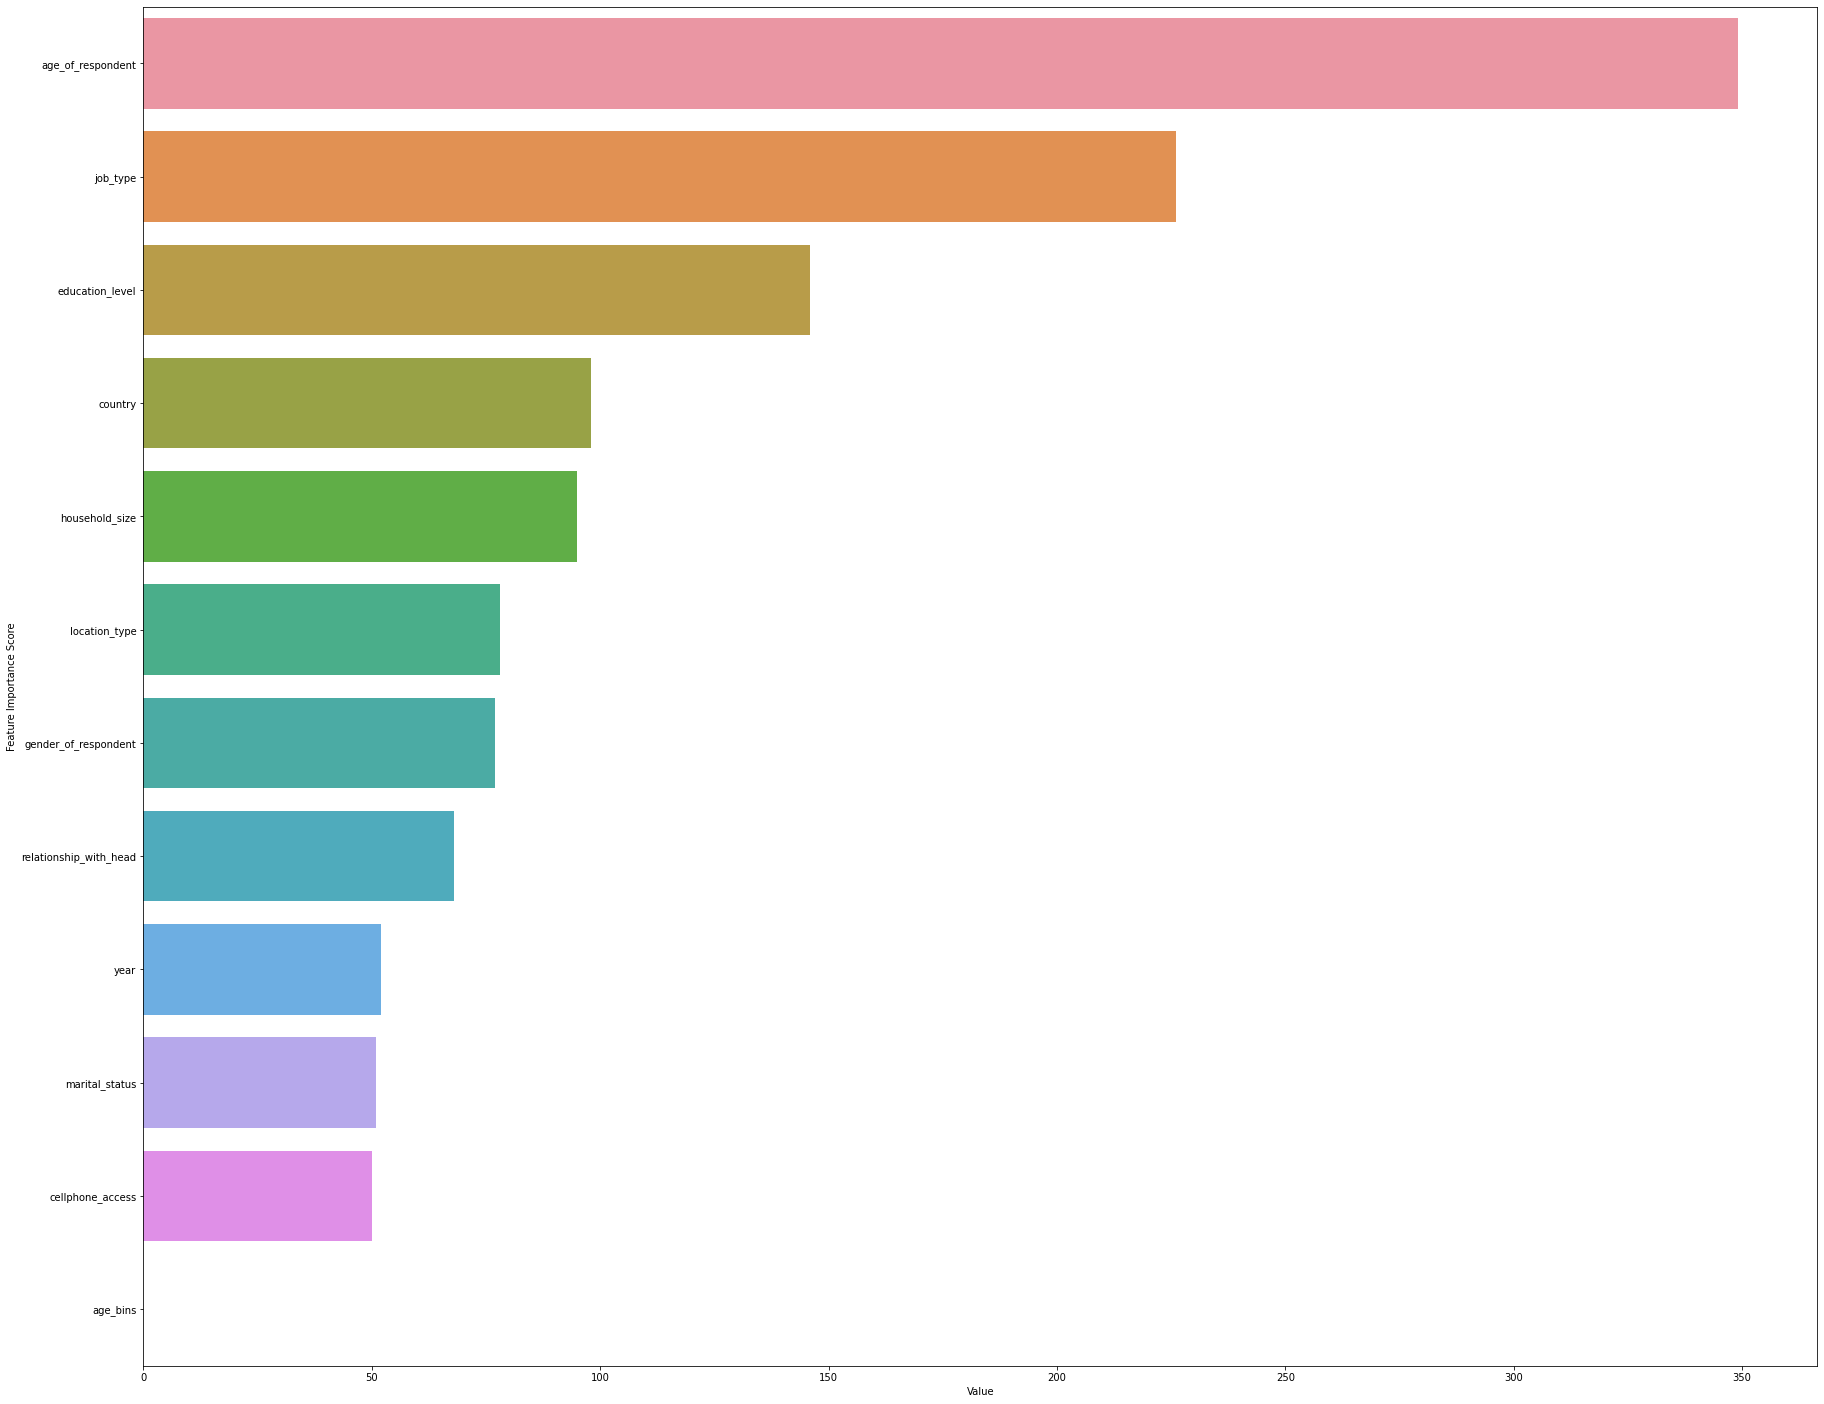

0.7947229371609206 0.8979862719085382 0.03711845002120513


In [66]:
lgb_model = lgb.LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt')

func_= func(train, target, test, lgb_model, 'lgbm', 1000)
val_p3, test_p3, model3 = func_()

================================Fold1====================================
Learning rate set to 0.024029
0:	test: 0.6947446	best: 0.6947446 (0)	total: 52.2ms	remaining: 8m 41s
50:	test: 0.8189256	best: 0.8189256 (50)	total: 318ms	remaining: 1m 2s
100:	test: 0.8266154	best: 0.8267408 (98)	total: 602ms	remaining: 59s
150:	test: 0.8293372	best: 0.8295359 (148)	total: 894ms	remaining: 58.3s
200:	test: 0.8301136	best: 0.8301136 (200)	total: 1.18s	remaining: 57.5s
250:	test: 0.8296499	best: 0.8302486 (209)	total: 1.45s	remaining: 56.4s
300:	test: 0.8298380	best: 0.8302486 (209)	total: 1.73s	remaining: 55.8s
350:	test: 0.8303552	best: 0.8303552 (350)	total: 2.01s	remaining: 55.3s
400:	test: 0.8299094	best: 0.8303552 (350)	total: 2.29s	remaining: 54.7s
450:	test: 0.8294637	best: 0.8303552 (350)	total: 2.56s	remaining: 54.1s
500:	test: 0.8292062	best: 0.8303552 (350)	total: 2.84s	remaining: 53.9s
550:	test: 0.8283174	best: 0.8303552 (350)	total: 3.12s	remaining: 53.5s
600:	test: 0.8276985	best: 

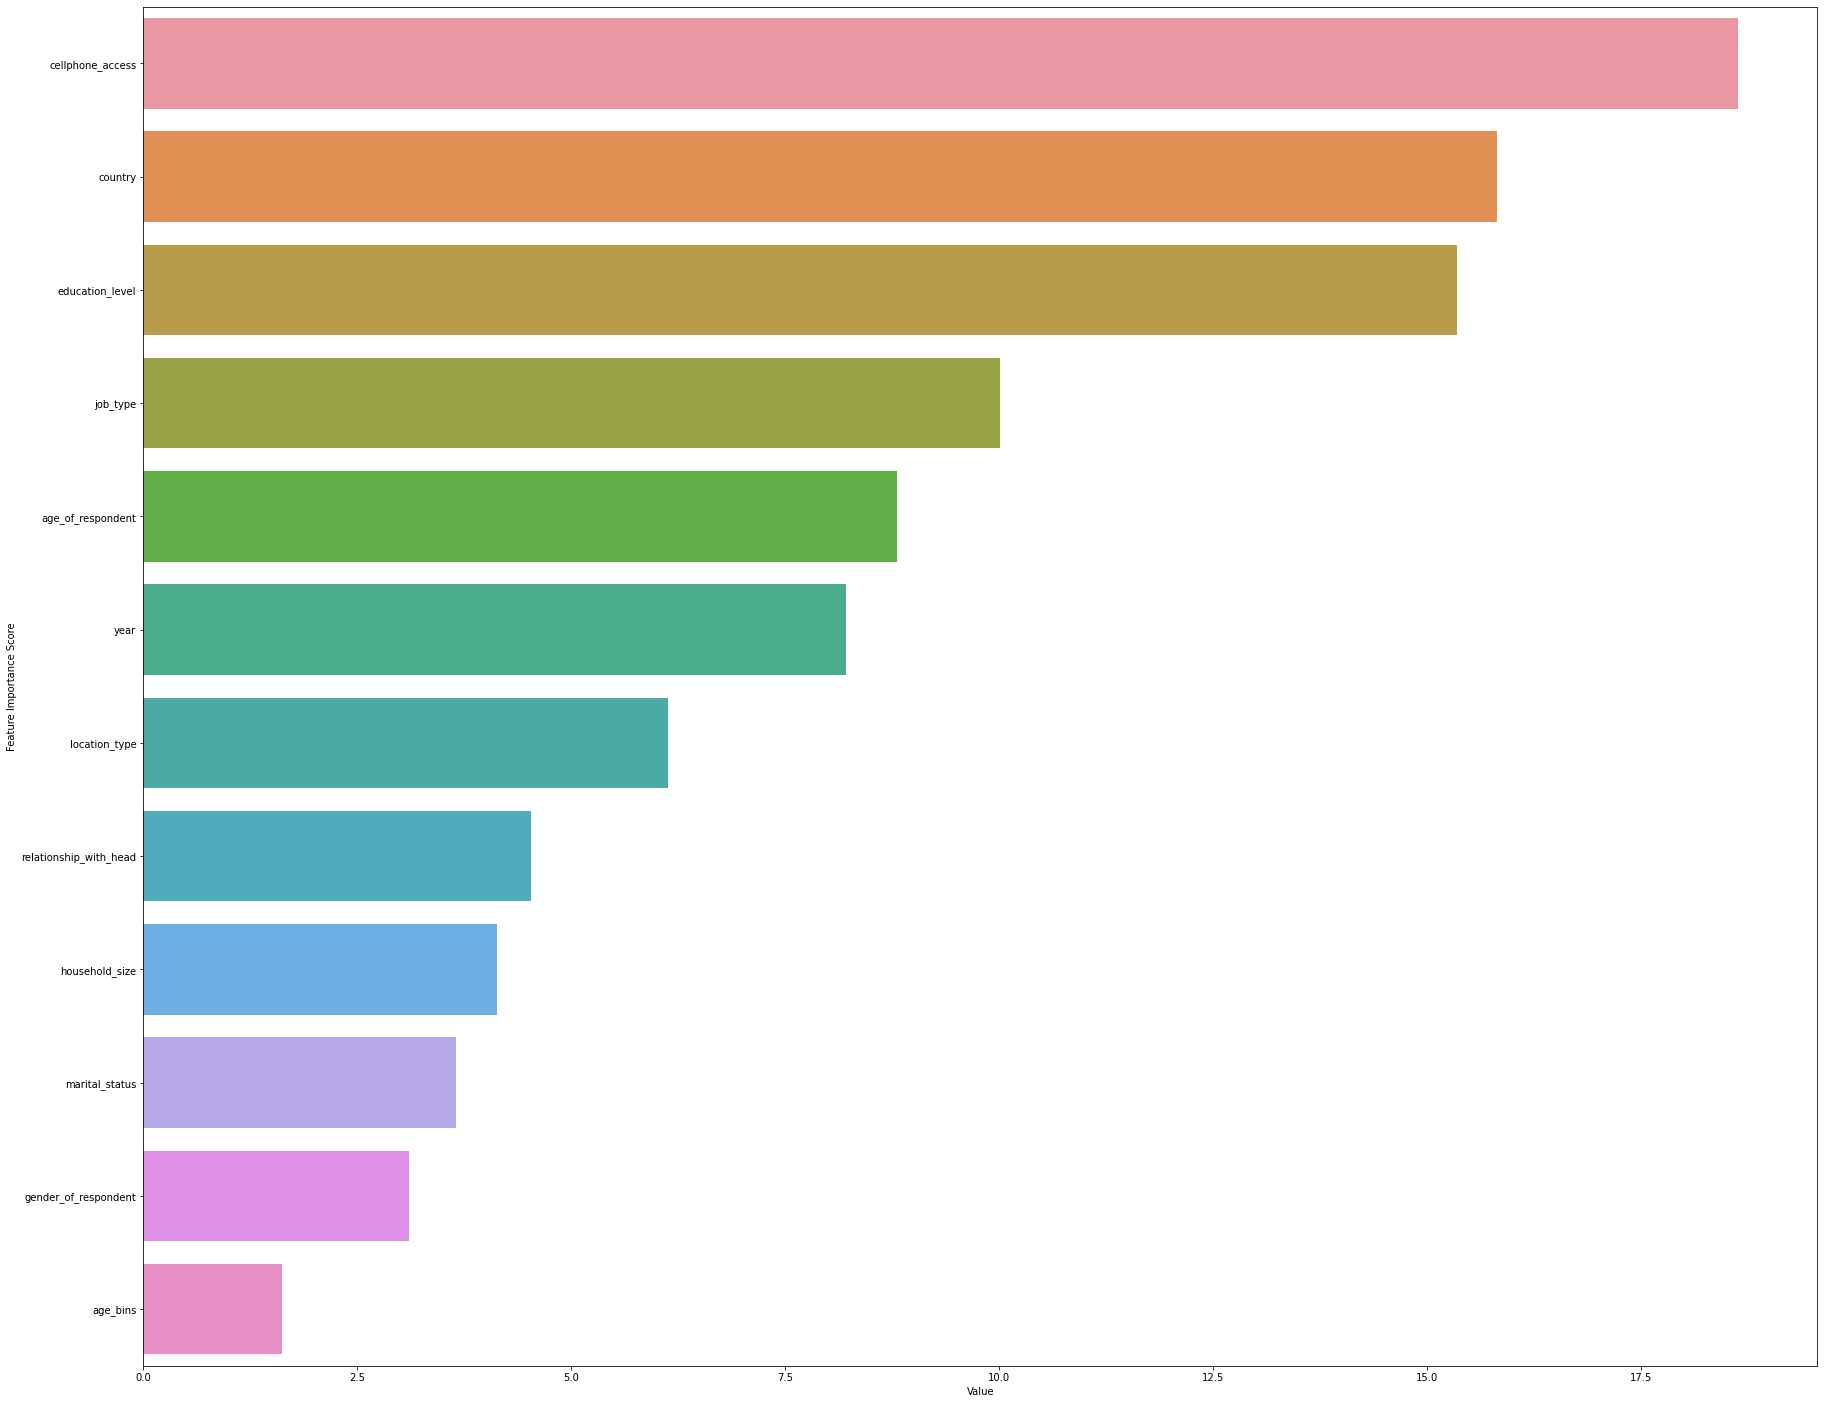

0.8066375780085785 0.888705655944389 0.043347994662862835


In [67]:

catboost = CatBoostClassifier(n_estimators=10000, eval_metric='AUC')

func_= func(train, target, test, catboost, 'catboost', 1000)
val_p1, test_p1, model1 = func_()

================================Fold1====================================
[0]	validation_0-auc:0.752679
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.750886
[2]	validation_0-auc:0.750886
[3]	validation_0-auc:0.754836
[4]	validation_0-auc:0.753756
[5]	validation_0-auc:0.756248
[6]	validation_0-auc:0.768476
[7]	validation_0-auc:0.76865
[8]	validation_0-auc:0.770963
[9]	validation_0-auc:0.771698
[10]	validation_0-auc:0.773518
[11]	validation_0-auc:0.77389
[12]	validation_0-auc:0.773638
[13]	validation_0-auc:0.772993
[14]	validation_0-auc:0.773618
[15]	validation_0-auc:0.773264
[16]	validation_0-auc:0.782859
[17]	validation_0-auc:0.782856
[18]	validation_0-auc:0.786566
[19]	validation_0-auc:0.788082
[20]	validation_0-auc:0.788051
[21]	validation_0-auc:0.788363
[22]	validation_0-auc:0.788352
[23]	validation_0-auc:0.794997
[24]	validation_0-auc:0.795389
[25]	validation_0-auc:0.795635
[26]	validation_0-auc:0.796392
[27]	validation_0-auc:0.79656
[28]	va

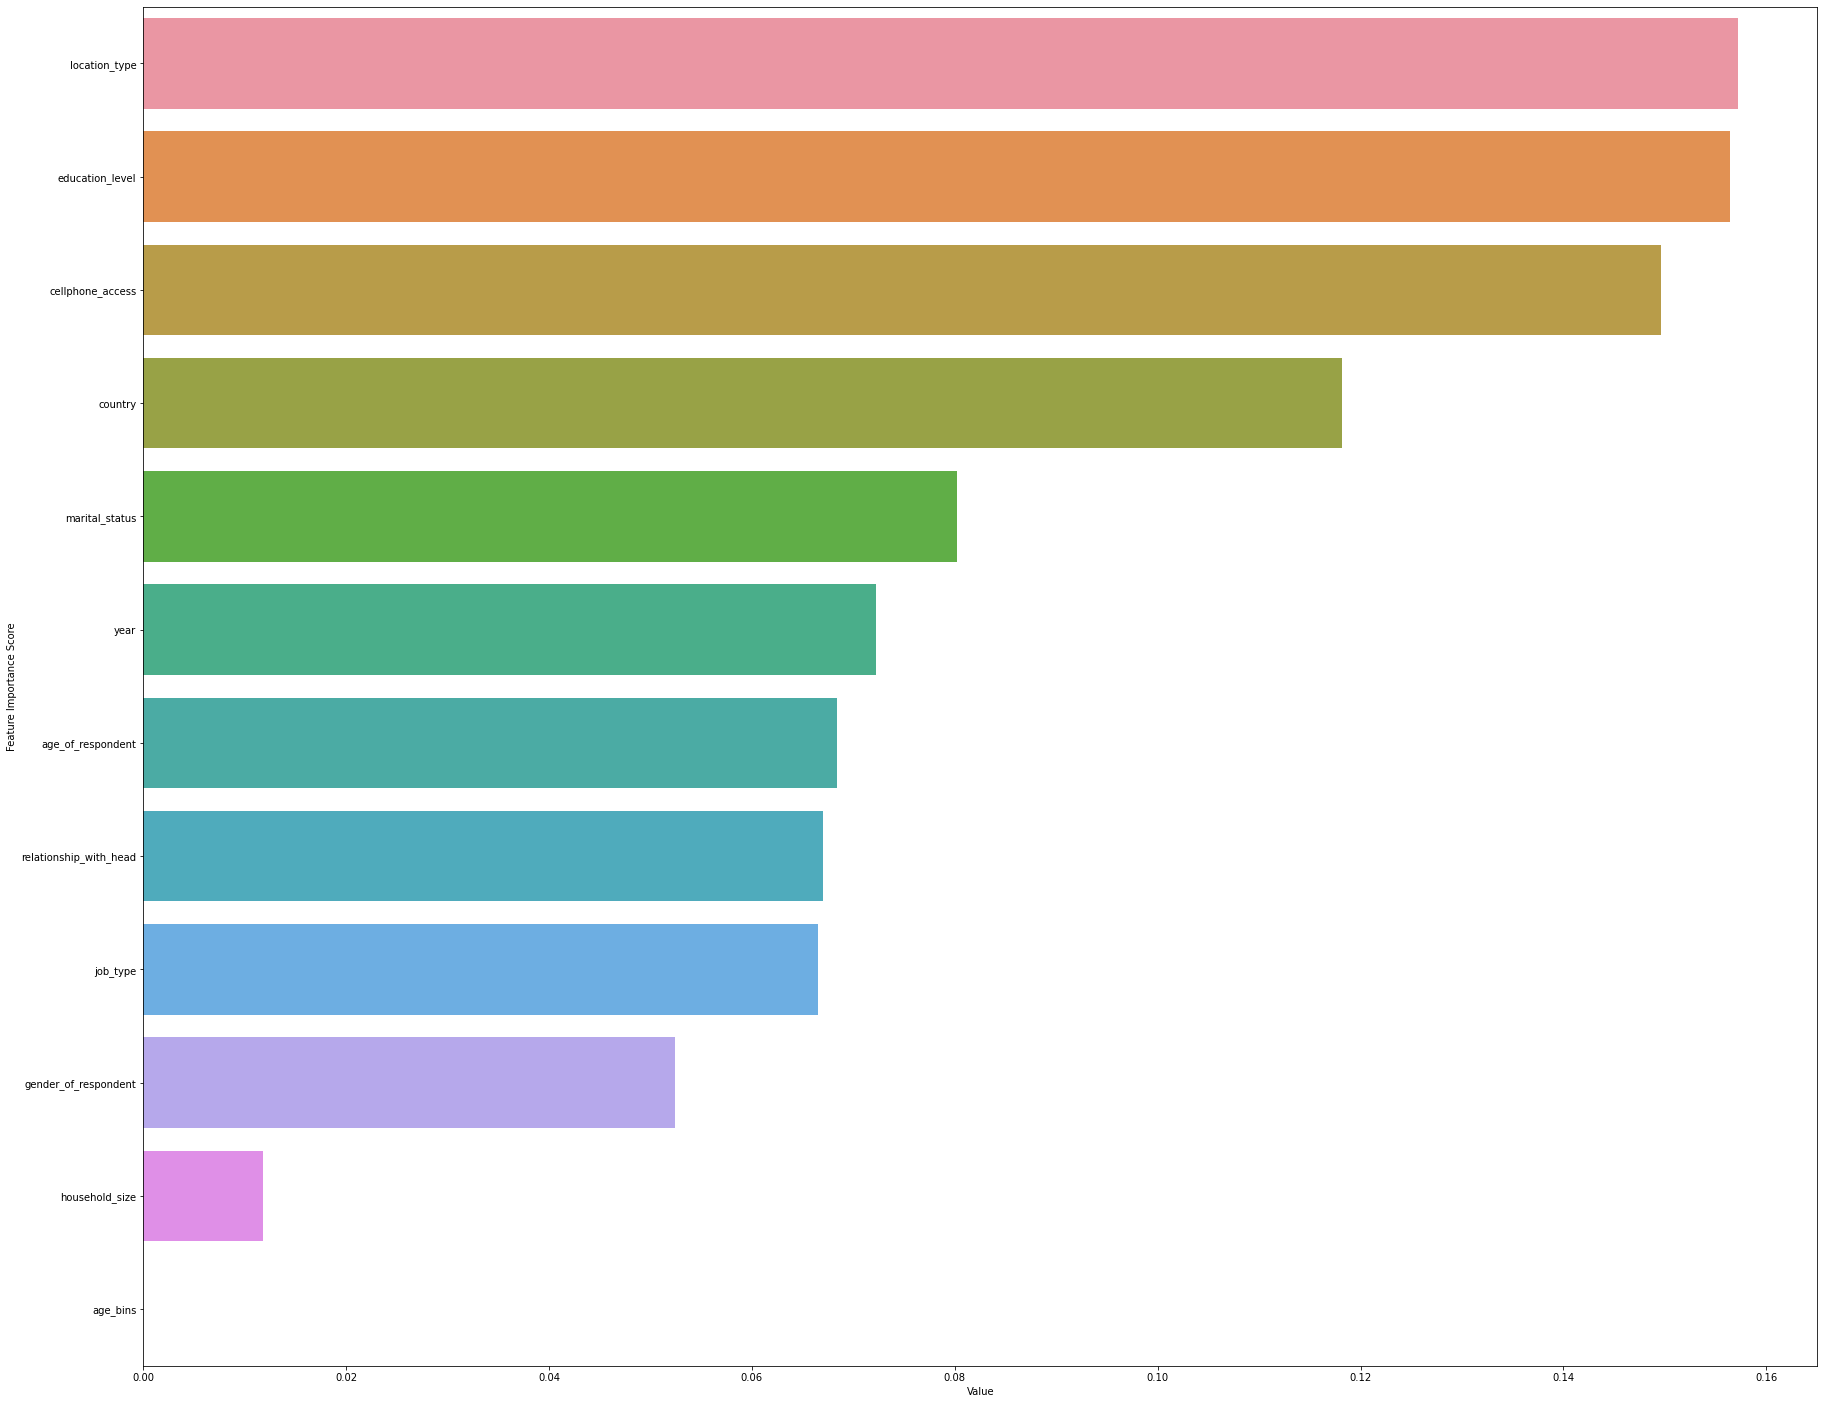

0.7983270737273274 0.8467092808556277 0.045128240815543924


In [68]:

xgboost = xgb.XGBClassifier()

func_= func(train, target, test, xgboost, 'xgboost', 1000)
val_p2, test_p2, model2 = func_()